<a href="https://colab.research.google.com/github/SimonDelgado/Procesamiento-Digital-Multimedia/blob/main/Actividad%206/Actividad_6_DelgadoSimon_202840051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Simón Delgado</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

Descarga de contenido

In [64]:
from pathlib import Path
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa, librosa.display
from IPython.display import Audio
import numpy as np
import torch

In [65]:
guitar, fs = librosa.load('/content/acoustic-guitar-loop-f-91bpm-132687.mp3', sr=None)

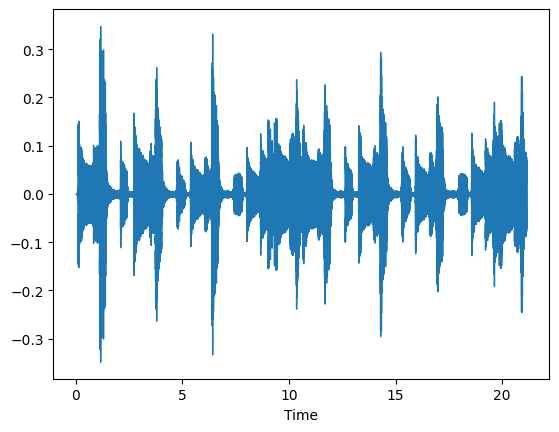

In [66]:
librosa.display.waveshow(guitar)

In [67]:
Audio(guitar, rate = fs)

In [68]:
guitar

array([ 0.0000000e+00, -3.0089039e-13, -1.6362319e-12, ...,
       -1.5716185e-04, -2.3748390e-04, -3.4928767e-04], dtype=float32)

Media

In [69]:
np.mean(guitar)

-6.0595185e-06

La media otorga el valor medio de la señal. Como la señal es casi igual hacia arriba y hacia abajo, la media es muy cercana a 0.

Kurtosis

In [70]:
kurtosis = np.mean((guitar - np.mean(guitar)) ** 4) / np.mean((guitar - np.mean(guitar)) ** 2) ** 2 - 3
kurtosis

3.8665139868085694

La kurtosis describe qué tan aplanada o puntiaguda es la señal. una distribución normal tiene kurtosis = 3. como la kurtosis dio 3.86, significa que es una distribución "puntiaguda".

Skewness

In [71]:
skewness = np.mean((guitar - np.mean(guitar)) ** 3) / np.mean((guitar - np.mean(guitar)) ** 2) ** (3 / 2)
skewness

0.07655765716925879

El skewness otorga información sobre la simetría con respecto al eje x. Un skewness cercano a 0, como es el caso, implica una señal más bien simétrica.

Zero Crossing Rate

In [72]:
zero_cross = librosa.zero_crossings(y=guitar+0.0001)
len(zero_cross)/20

23328.0

Es la tasa de cruce por el cero, o la cantidad de cruces que tiene la señal por unidad de tiempo. En este caso, se cruza 23328 veces por segundo.

Spectral Centroid

In [73]:
SC = librosa.feature.spectral_centroid(y=guitar)
np.mean(SC)

639.1740663494323

El centroide espectral es una medida que describe la distribución de las frecuencias. Es la frecuencia promedio, y a su alrededor se distribuyen las energías del resto de frecuencias.

Energía

In [74]:
energia = sum(abs(guitar**2))
energia

667.6770553402671

Es la energía total de la señal en el intervalo de tiempo.

RMSE

In [75]:
RMSE = librosa.feature.rms(y=guitar, frame_length = 512, hop_length = 256, center=True)
RMSE = np.mean(RMSE)
RMSE

0.030657329

Un RMSE indica un error bajo en referencia a la señal real. En este caso es cercano a 0.

Frecuencia Fundamental

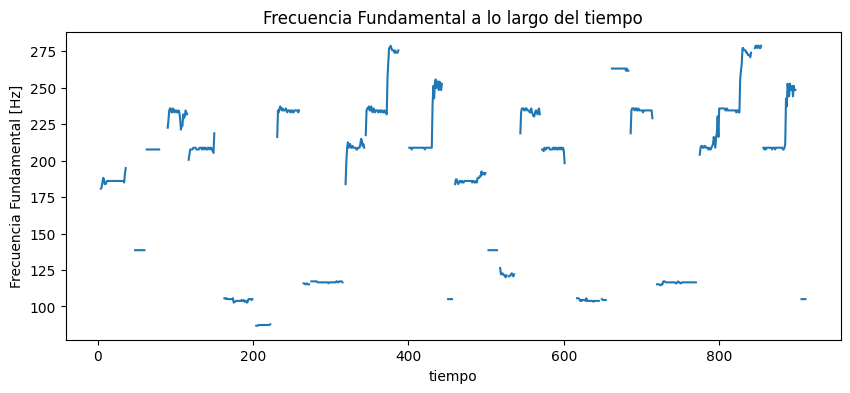

In [63]:
f0, voiced_flag, _ = librosa.pyin(guitar, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=fs)

plt.figure(figsize=(10, 4))
plt.plot(f0)
plt.xlabel('tiempo')
plt.ylabel('Frecuencia Fundamental [Hz]')
plt.title('Frecuencia Fundamental a lo largo del tiempo')
plt.show()

La frecuencia fundamental es la frecuencia más baja de una onda y es la que determina el tono percibido. En la gráfica, se ve la variación de la frecuencia fundamental en el tiempo.

## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


Text(0, 0.5, 'frecuencias')

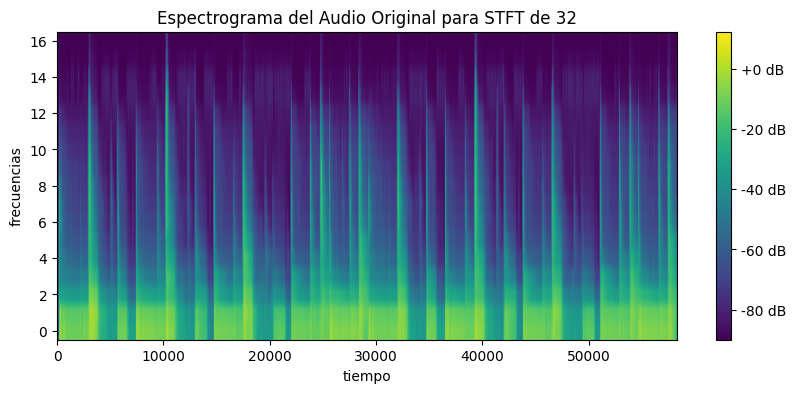

In [76]:
tensor_guitar = torch.tensor(guitar)
n_fft = 32
window = torch.hann_window(n_fft)
espectrograma = torch.stft(tensor_guitar, n_fft=n_fft, window=window, return_complex=True)
espectrograma_dB = 10 * torch.log10(torch.abs(espectrograma)**2+1e-9)

plt.figure(figsize=(10,4))
plt.imshow(espectrograma_dB.numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del Audio Original para STFT de 32')
plt.xlabel('tiempo')
plt.ylabel('frecuencias')

Text(0, 0.5, 'frecuencias')

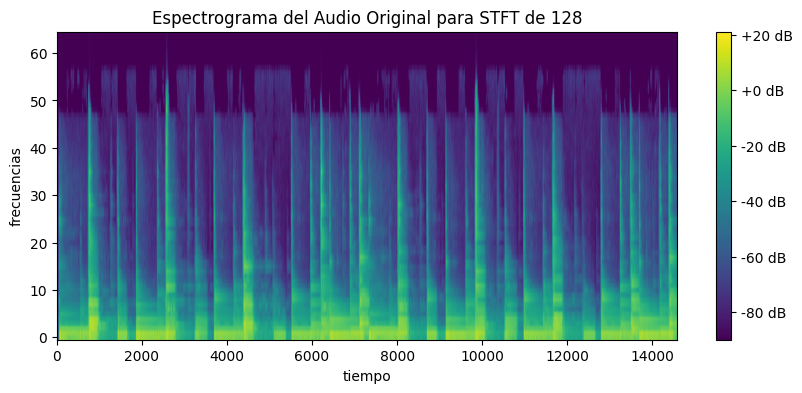

In [77]:
tensor_guitar = torch.tensor(guitar)
n_fft = 128
window = torch.hann_window(n_fft)
espectrograma = torch.stft(tensor_guitar, n_fft=n_fft, window=window, return_complex=True)
espectrograma_dB = 10 * torch.log10(torch.abs(espectrograma)**2+1e-9)

plt.figure(figsize=(10,4))
plt.imshow(espectrograma_dB.numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del Audio Original para STFT de 128')
plt.xlabel('tiempo')
plt.ylabel('frecuencias')

Text(0, 0.5, 'frecuencias')

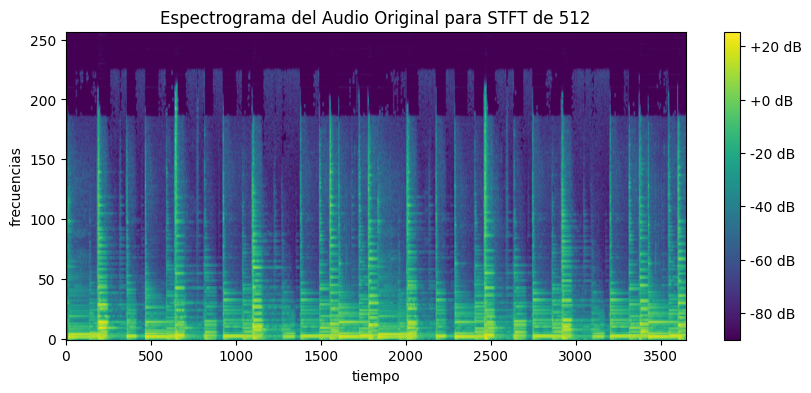

In [78]:
tensor_guitar = torch.tensor(guitar)
n_fft = 512
window = torch.hann_window(n_fft)
espectrograma = torch.stft(tensor_guitar, n_fft=n_fft, window=window, return_complex=True)
espectrograma_dB = 10 * torch.log10(torch.abs(espectrograma)**2+1e-9)

plt.figure(figsize=(10,4))
plt.imshow(espectrograma_dB.numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del Audio Original para STFT de 512')
plt.xlabel('tiempo')
plt.ylabel('frecuencias')

### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
